#  JAR Assignment for Business Analyst Intern

## Business Requirement Document

### **Project Title:** Sales & Performance Analysis
### **Prepared By:** Erteqa Hossain  
### **Role:** Business Analyst Intern Candidate  
### **Tools Used:** Python (Pandas, Matplotlib)
### **Date:** 15-11-2025


## **1️ Objective**
The objective of this analysis is to evaluate sales, profitability, target achievement, and regional performance based on the provided datasets.  
Additionally, explore user and product insights to recommend improvements and growth opportunities for the Jar app.


## **2 Success Criteria**
1. Identify top-performing and underperforming categories.  
2. Highlight trends in target achievements and suggest alignment strategies.  
3. Uncover regional disparities in sales/profitability.  
4. Provide actionable app and product improvement insights.  


## **3 Deliverables**
- Analytical findings with visualizations  
- Actionable insights 
- Recommendations aligned with Jar’s product and market goals


-----

# Sales and Profitability Analysis

In [3]:
import pandas as pd  #importing the library
import matplotlib.pyplot as plt

In [4]:
order = pd.read_excel("List_of_Orders_1.xlsx")
detail = pd.read_excel("Order_Details_1.xlsx")  ###Loading the Datasets

In [5]:
order.head() ##just to see if the excel file is loaded correctly

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


In [6]:
detail.head() ##just to see if the excel file is loaded correctly

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


In [7]:
merged= pd.merge(order, detail, on="Order ID") ## on = "outer" could have been added but wihtout mentioned also it does the same

In [8]:
merged.head() ## checking

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [9]:
merged.isnull().sum() ##checking for any null values

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [10]:
sales_per_category = merged.groupby("Category")["Amount"].sum().reset_index()

In [11]:
sales_per_category

,Category,Amount
0,Clothing,139054
1,Electronics,165267
2,Furniture,127181


In [12]:
category_cal = merged.groupby("Category").agg(average_profit_per_order=("Profit", "mean"))


In [13]:
category_cal

,average_profit_per_order
Category,
Clothing,11.762908
Electronics,34.071429
Furniture,9.456790


In [14]:
category_cal= merged.groupby("Category").agg(total_amount=("Amount", "sum"),total_profit=("Profit", "sum"))

In [15]:
category_cal

,total_amount,total_profit
Category,,
Clothing,139054,11163
Electronics,165267,10494
Furniture,127181,2298


In [16]:
category_cal["Total_Profit_Margin"] = (category_cal["total_profit"] / category_cal["total_amount"]) * 100


In [17]:
category_cal

,total_amount,total_profit,Total_Profit_Margin
Category,,,
Clothing,139054,11163,8.027817
Electronics,165267,10494,6.349725
Furniture,127181,2298,1.806874


In [18]:
cat_performance= pd.merge(sales_per_category, category_cal, on="Category")

In [19]:
cat_performance = cat_performance.drop(columns=["Amount"]) ## total_amount and amount coloumn is same

In [20]:
cat_performance.sort_values(by="Total_Profit_Margin", ascending=False)

,Category,total_amount,total_profit,Total_Profit_Margin
0,Clothing,139054,11163,8.027817
1,Electronics,165267,10494,6.349725
2,Furniture,127181,2298,1.806874


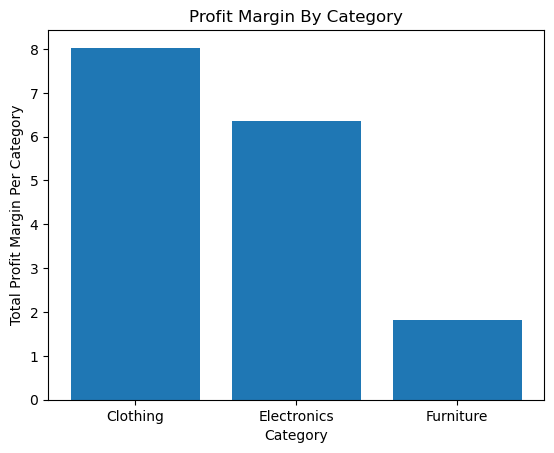

In [21]:
plt.bar(cat_performance["Category"], cat_performance["Total_Profit_Margin"])
plt.title("Profit Margin By Category")
plt.xlabel("Category")
plt.ylabel("Total Profit Margin Per Category")
plt.show()

## REASON WHY CLOTHING HAS A HIGHER PROFIT MARGIN THAN FURNITURE
Based on the analysis, clothing shows a higher profit margin compared to furniture due to:
1. Data Evidence : Furniture orders show large negative profits like -1148, -111, and -272, while clothing orders show small losses or gains. This clearly indicates that the costs associated with furniture transactions are higher. 
2. Operation Cost Difference: Furniture items like bookcases, chairs, and tables are heavy and bulky, so the shipping charges, packaging costs, installation, and even the storage cost could exceed the selling price. On the other hand, clothing items are lightweight and not fragile, so naturally the overall operational cost reduces.
3. High return and exchange cost: Large and fragile items have a higher risk of damage and higher return rates, which directly reduce profit. Whereas clothing item returns are cheaper to process and have minimal risk of damage.

----

# Target Achievement Analysis

In [22]:
sales = pd.read_excel("Sales_target_1.xlsx")

In [23]:
sales.head()

,Month of Order Date,Category,Target
0,2025-04-18,Furniture,10400
1,2025-05-18,Furniture,10500
2,2025-06-18,Furniture,10600
3,2025-07-18,Furniture,10800
4,2025-08-18,Furniture,10900


In [24]:
furniture_df = sales[sales["Category"] == "Furniture"].copy()

In [25]:
furniture_df["Target"].pct_change().head() ## fractional change

0         NaN
1    0.009615
2    0.009524
3    0.018868
4    0.009259
Name: Target, dtype: float64

In [26]:
furniture_df ["Month-over-Month Change"]= furniture_df["Target"].pct_change() * 100 ## actual percent change

In [27]:
furniture_df

,Month of Order Date,Category,Target,Month-over-Month Change
0,2025-04-18,Furniture,10400,NaN
1,2025-05-18,Furniture,10500,0.961538
2,2025-06-18,Furniture,10600,0.952381
3,2025-07-18,Furniture,10800,1.886792
4,2025-08-18,Furniture,10900,0.925926
5,2025-09-18,Furniture,11000,0.917431
6,2025-10-18,Furniture,11100,0.909091
7,2025-11-18,Furniture,11300,1.801802
8,2025-12-18,Furniture,11400,0.884956
9,2025-01-19,Furniture,11500,0.877193


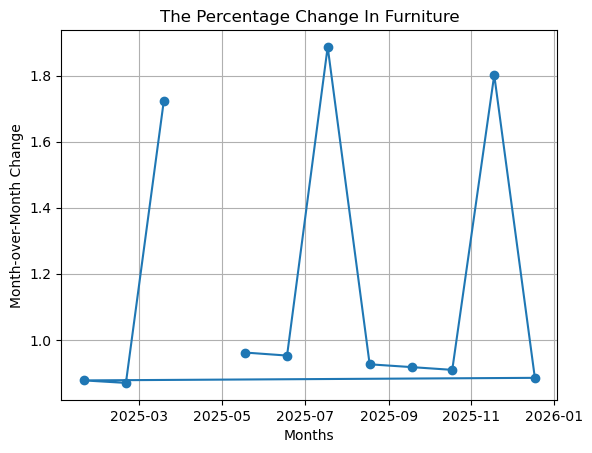

In [28]:
plt.plot(furniture_df["Month of Order Date"], furniture_df["Month-over-Month Change"], marker="o")
plt.title("The Percentage Change In Furniture")
plt.xlabel("Months")
plt.ylabel("Month-over-Month Change")
plt.grid(True)
plt.show()

## Significant Target Fluctuations:
The data indicates the high performance months are March'2025, July'2025 and November'2026.
The remaining months specially (DEC'2025-FEB'2026) show lower performance compared to their targets and decline in performance relative to the peak months.
## Stratagies for aligning target expectations with actual performance trends
1. Align resources:
     1. For peak performance month increase promotion, advertisement and stock.
     2. For lower performance month focus on improving customer experience.
2. Deep-dive analysis: compare the monthly performance with previous years
     1. If the performance is consistently lower for a month, adjust the target downward.
     2. If the performance is higher, increase the target.
4. Category-specific targeting: Assign higher targets to stable categories and set more conservative targets for categories that show high fluctuation.
5. Rolling forecast: Instead of following targets rigidly whole year, set quaterly, monthly or three-month rolling forcast. This allows target to be more flexible.

---

# Regional Performance Insights

In [112]:
order_level_df = merged.groupby(["Order ID", "State"]).agg(Order_Sales=("Amount", "sum"),Order_Profit=("Profit", "sum")
).reset_index()

In [113]:
state_orders = order_level_df.groupby("State")["Order ID"].count().nlargest(5).reset_index(name="Order_Count")
top_5_states = state_orders["State"].tolist()

In [114]:
filter_order = order_level_df[order_level_df["State"].isin(top_5_states)]

In [115]:
regional_performance = filter_order.groupby("State").agg(Total_Sales=("Order_Sales", "sum"),Average_Profit_per_Order=("Order_Profit", "mean")
).reset_index()

In [116]:
regional_performance

,State,Total_Sales,Average_Profit_per_Order
0,Gujarat,21058,17.222222
1,Madhya Pradesh,105140,54.960396
2,Maharashtra,95348,68.622222
3,Punjab,16786,-24.360000
4,Rajasthan,21149,39.281250


In [117]:
regional_performance = regional_performance.merge(state_orders, on="State", how="inner")
regional_performance = regional_performance.sort_values(by="Order_Count", ascending=False)

In [118]:
print(regional_performance.to_markdown(index=False))

| State          |   Total_Sales |   Average_Profit_per_Order |   Order_Count |
|:---------------|--------------:|---------------------------:|--------------:|
| Madhya Pradesh |        105140 |                    54.9604 |           101 |
| Maharashtra    |         95348 |                    68.6222 |            90 |
| Rajasthan      |         21149 |                    39.2812 |            32 |
| Gujarat        |         21058 |                    17.2222 |            27 |
| Punjab         |         16786 |                   -24.36   |            25 |


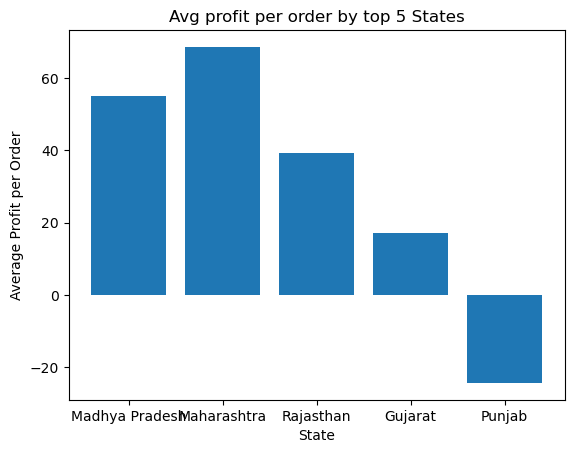

In [120]:
plt.bar(regional_performance["State"], regional_performance["Average_Profit_per_Order"])
plt.title("Avg profit per order by top 5 States")
plt.xlabel('State')
plt.ylabel('Average Profit per Order')
plt.show()

## Regional Disparities in Sales and Profit
1. Maharastra: Demonstrates the highest profit generating per transaction amoung the high volumne states.
2. Madhya Pradesh: Has highest order count (101) but a significantly lower average profit compared to Maharashtra.
3. Rajasthan: An average performance state, Jaipur showing negative profit causing the average loss of the state
4. Gujarat: At risk, a small increase in the management cost may push the state into loss making region.
5. Punjab: Already at loss, every transaction cost the company money. Poor operational or discount mismanagement in the region.
# High Priority States
1. Punjab:
    1. Temporary freeze or restrict high range discounts.
    2. Review shipping contracts and packaging costs in the region to reduce operational cost.
3. Gujarat:
    1. Punjab and gujarat both should add a manadatory handling charge for bulk orders to manage the sales price and overall transporation cost.
    2. Do not completely freeze but reduce discount range to protect margins.
# Optimization Priority States
1. Maharashtra & Madhya Pradesh:
    1. Focus on upselling items to increase the average profit per order.
2. Rajasthan:
    1. Identify and eliminate specific loss drivers in Jaipur to prevent further negative impact on state performance.

---------------------------------------------

# App Exploration:

### Jar App Review
#### Effective & User-Friendly Features:
1. Daily, weekly, monthly along with instant saving option: users can automate savings based on their preference, with the amount being invested in 24K digital gold automatically.
2. Clean and responsive user interface: interface is simple and responsive, making it easy for users of all age groups to navigate and perform transactions smoothly.
3. Nek the in-house brand launched by Jar: allow users to convert their digital gold savings into physical jewellery items.
4. Informative tools and calculator: value-added resources such as the 8th Pay Commission Salary Calculator, Gold Rate Calculator, and other financial tools
5. Educational Financial Blogs: includes a blog section aimed at educating users about personal finance, savings strategies, and customer success story.
#### Areas for Improvement:
***Jar is already a well-established and trusted platform, so major changes are not required. However, a few enhancements could significantly improve user experience:***
1. Enable the dark mode: Adding a dark theme can help reduce eye strain and enhance usability for users who prefer low-light interfaces.
2. Saving in a group: Allow users to create private groups to track progress toward a shared savings goal like vacation fund or wedding etc.
3. Improved Customer Support Integration: Adding in-app chat support for faster query resolution can strengthen user trust.
4. Jar legacy level: Tiered status levels like Bronze, Gold, Diamond based on total time on the platform and successful goal completion can encourage user to stay for longer period of time.
5. Customized data export: Allow users download their transaction in a customizable format with user-defined date ranges and fields.

# Product Exploration:

1. Family/Group Saving Jar: like a digital chit fund or savings pool but with the simplicity and automation of Jar.
   1. Automated Contribution: Like fixed SIP.
   2. Transparent Tracking: All members can view the total process towards the goal.
   3. Total amount of Assets grows significantly by th pool funds from multiple users.
   4. The already available feature of individual saving can be combined for a group.
2. Micro-investment in Mutual Funds: Users auto-invest their spare change or daily micro-savings into diversified funds.
   1. Use the existing automated "spare change" investment but rather than just "24k gold" digital gold to other diversified funds as well.
3. Subscription-based education: Jar as the most truted educational source through blogs can monetize the expert knowledge.
   1. Utilize the already available blog page by providing highly personalized financial literacy modules (video, interactive tools) where the content is tailored based on the user's live Jar data.
4. Digital asset: Enhance beyond gold to other secure digital asset like government bonds
   1. Jar as a platform for secure, digital, asset backed saving can inculcate the users to buy government bonds and fractional real estate ownership.
5. Reward & partnership: Partnerships with brands where users earn cashbacks that convert directly into gold or savings.
   1. Just like Nek the in-house brand, jar can collab with other websites as well to convert digital gold to physical jewellery and earn rewards.
6. Insurance and financial marketplace: Partner with major insurers and banks.
   1. Use user data to trigger highly relevant, timely insurance offers, while maintaining trust and simplicity.
7. Automated Tax Savings Plan: Integrate direct investment options into tax-saving instruments like NPS (National Pension System).
   1. Use the automation logic to set aside funds monthly toward a user's required tax-saving limit. 
